<a href="https://colab.research.google.com/github/ReasonDuan/machine-learning-code/blob/main/network_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 前置函数


In [41]:
import numpy as np


# 激活函数
def sigmoid(x):
 return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

# 最大值
def softmax(a):
 exp_a = np.exp(a)
 sum_exp_a = np.sum(exp_a)
 y = exp_a / sum_exp_a
 return y


# 函数f在x处的梯度计算
def numerical_gradient(f, x):
 h = 1e-4 # 0.0001
 grad = np.zeros_like(x) # 生成和x形状相同的数组
 for idx in range(x.size):
  tmp_val = x[idx]
  # f(x+h)的计算
  x[idx] = tmp_val + h
  fxh1 = f(x)
  # f(x-h)的计算
  x[idx] = tmp_val - h
  fxh2 = f(x)
  grad[idx] = (fxh1 - fxh2) / (2*h)
  x[idx] = tmp_val # 还原值
 return grad

# 交叉熵，监督数据为one-hot模式
def cross_entropy_error(y, t):
 if y.ndim == 1:
  t = t.reshape(1, t.size)
  y = y.reshape(1, y.size)
 batch_size = y.shape[0]
 return -np.sum(t * np.log(y + 1e-7)) / batch_size


# 交叉熵, 监督数据为指定值 2，8
def cross_entropy_error_02(y, t):
 if y.ndim == 1:
  t = t.reshape(1, t.size)
  y = y.reshape(1, y.size)
 batch_size = y.shape[0]
 return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def change_one_hot_label(X):
  T = np.zeros((X.size, 10))
  for idx, row in enumerate(T):
      row[X[idx]] = 1

  return T


## 创建神经网络类

创建一个2层神经网络的类

In [39]:

import sys, os
sys.path.append(os.pardir)

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  # 预测
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y

  # 损失率， x: 输入数据, t: 监督数据
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  # 准确率
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # 权重参数相对损失函数的梯度计算
  def numerical_gradient_full(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

  def gradient(self, x, t):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    grads = {}

    batch_num = x.shape[0]

    # forward
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    # backward
    dy = (y - t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis=0)

    da1 = np.dot(dy, W2.T)
    dz1 = sigmoid_grad(a1) * da1
    grads['W1'] = np.dot(x.T, dz1)
    grads['b1'] = np.sum(dz1, axis=0)

    return grads

## 拉取数据
获取训练数据，并进行初始化
**加粗文字**

In [37]:
!pip install -q tensorflow
import tensorflow as tf

# 加载 MNIST 数据集
mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
t_train = change_one_hot_label(t_train)
t_test = change_one_hot_label(t_test)


# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_laobel = True)
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)


## 开始训练

train acc, test acc | 0.21298333333333333, 0.2172
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135


<ipython-input-41-a8bce8d1d44b>:13: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-41-a8bce8d1d44b>:15: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098


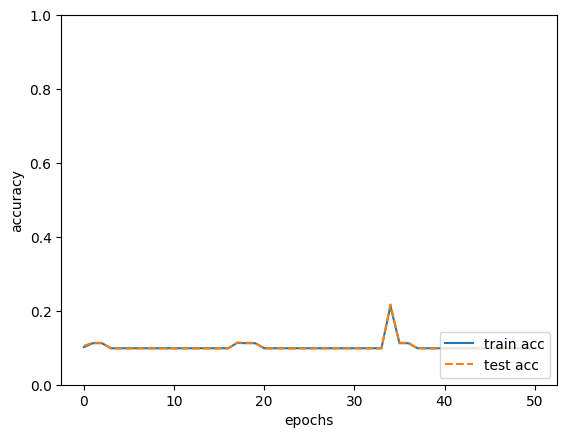

In [44]:
!pip install matplotlib

import matplotlib.pyplot as plt

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  # 计算每个epoch的识别精度
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()